# Explore here

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()



True

In [3]:
# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [4]:
# Inicializar biblioteca Spotipy
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

response = spotify.artist_top_tracks("4dpARuHxo51G3z768sgnrY")

canciones = []
for s in response["tracks"]:
    canciones.append({
        'name': s['name'],
        'popularity': s['popularity'],
        'duration_min': s['duration_ms'] / 60000
    })

In [5]:
df = pd.DataFrame(canciones)
df

,name,popularity,duration_min
0,Easy On Me,85,3.744900
1,Set Fire to the Rain,81,4.049550
2,Someone Like You,81,4.754000
3,Rolling in the Deep,80,3.801550
4,Skyfall,86,4.774667
5,Love In The Dark,77,4.765583
6,Hometown Glory,75,4.520433
7,When We Were Young,75,4.848333
8,Chasing Pavements,74,3.508433
9,Hello,74,4.925033


In [6]:
dftop3 = df.sort_values(by="popularity", ascending=False).head(3)
dftop3

,name,popularity,duration_min
4,Skyfall,86,4.774667
0,Easy On Me,85,3.744900
1,Set Fire to the Rain,81,4.049550


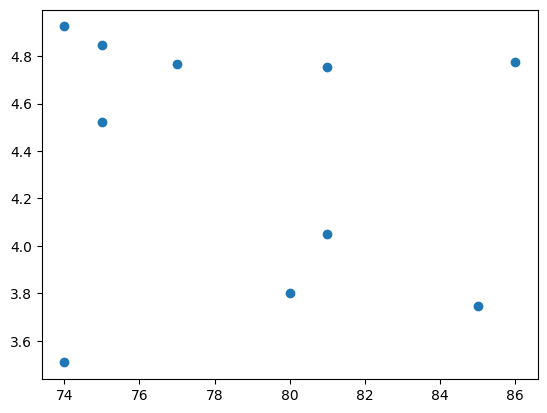

In [7]:
plt.Figure(figsize=(10,6))
plt.scatter(x=df["popularity"],y=df["duration_min"])
plt.show();

Analizando el grafico se puede ver que no tiene relacion la popularidad con la duracion de la cancion. Hay canciones mas cortas igual de populares

In [18]:
track_ids = [track["id"] for track in response["tracks"]]
features = spotify.audio_features(track_ids)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=46IZ0fSY2mpAiktS3KOqds,73CMRj62VK8nUS4ezD2wvi,1zwMYTA5nlNjZxYrvBB2pV,1c8gk2PeTE04A1pIDH9YMk,6VObnIkLVruX4UVyxWhlqm,7B5Npv8NjjTCzk8PLpU66h,19QzuPTNZHJ2SEu5LCQTGI,7GgWAITsYJaRM3r50rfh5w,56pHllZT7QOacB0bP56ofx,62PaSfnXSMyLshYJrlTuL3 with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=46IZ0fSY2mpAiktS3KOqds,73CMRj62VK8nUS4ezD2wvi,1zwMYTA5nlNjZxYrvBB2pV,1c8gk2PeTE04A1pIDH9YMk,6VObnIkLVruX4UVyxWhlqm,7B5Npv8NjjTCzk8PLpU66h,19QzuPTNZHJ2SEu5LCQTGI,7GgWAITsYJaRM3r50rfh5w,56pHllZT7QOacB0bP56ofx,62PaSfnXSMyLshYJrlTuL3:
 None, reason: None